In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# !pip install lightgbm

In [2]:
# 2. Load the dataset
df = pd.read_csv("child_behavior_habit_tracker.csv")
print("Shape:", df.shape)
df.head(5)

Shape: (200, 9)


,Age,Gender,Sleep_Hours,Study_Hours,Play_Hours,Screen_Time,Meals_Per_Day,Mood,Behavior_Category
0,12,Female,7.0,-0.6,3.3,3.2,2,Sad,Unhealthy
1,9,Male,9.0,3.1,3.1,3.4,2,Happy,Needs Improvement
2,10,Male,11.0,0.1,2.1,3.5,2,Happy,Needs Improvement
3,12,Female,7.9,2.6,3.0,3.1,2,Happy,Needs Improvement
4,8,Female,7.6,1.8,3.2,3.5,4,Happy,Needs Improvement


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                200 non-null    int64  
 1   Gender             200 non-null    object 
 2   Sleep_Hours        200 non-null    float64
 3   Study_Hours        200 non-null    float64
 4   Play_Hours         200 non-null    float64
 5   Screen_Time        200 non-null    float64
 6   Meals_Per_Day      200 non-null    int64  
 7   Mood               200 non-null    object 
 8   Behavior_Category  200 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 14.2+ KB


In [7]:
df.isnull().sum()

Age                  0
Gender               0
Sleep_Hours          0
Study_Hours          0
Play_Hours           0
Screen_Time          0
Meals_Per_Day        0
Mood                 0
Behavior_Category    0
dtype: int64

In [9]:
df["Behavior_Category"].value_counts()  # Clearly shows here it is imbalanced dataset

Behavior_Category
Needs Improvement    144
Unhealthy             28
Healthy               28
Name: count, dtype: int64

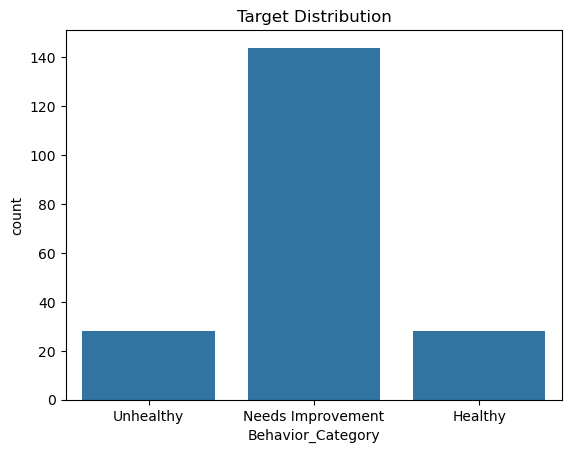

In [11]:
# EDA - Class distribution
sns.countplot(x="Behavior_Category", data=df)
plt.title("Target Distribution")
plt.show()

In [13]:
df['Mood'].value_counts()

Mood
Happy      116
Neutral     55
Sad         29
Name: count, dtype: int64

In [15]:
df.columns

Index(['Age', 'Gender', 'Sleep_Hours', 'Study_Hours', 'Play_Hours',
       'Screen_Time', 'Meals_Per_Day', 'Mood', 'Behavior_Category'],
      dtype='object')

In [17]:
numerical_col = [i for i in df.columns if df[i].dtype in ['int64', 'float64']]
print(numerical_col)

['Age', 'Sleep_Hours', 'Study_Hours', 'Play_Hours', 'Screen_Time', 'Meals_Per_Day']


In [19]:
categorical_col = [col for col in df.columns if col not in numerical_col]

print(categorical_col)

['Gender', 'Mood', 'Behavior_Category']


In [21]:
# Encode categorical columns
label_encoders = {}
df_encoded = df.copy()
for col in categorical_col:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [23]:
df_encoded.head(5)

,Age,Gender,Sleep_Hours,Study_Hours,Play_Hours,Screen_Time,Meals_Per_Day,Mood,Behavior_Category
0,12,0,7.0,-0.6,3.3,3.2,2,2,2
1,9,1,9.0,3.1,3.1,3.4,2,0,1
2,10,1,11.0,0.1,2.1,3.5,2,0,1
3,12,0,7.9,2.6,3.0,3.1,2,0,1
4,8,0,7.6,1.8,3.2,3.5,4,0,1


In [27]:
label_encoders

{'Gender': LabelEncoder(),
 'Mood': LabelEncoder(),
 'Behavior_Category': LabelEncoder()}

In [29]:
X= df_encoded.iloc[:,:-1].to_numpy()
y= df_encoded.iloc[:,-1].to_numpy()

In [31]:
X

array([[12. ,  0. ,  7. , ...,  3.2,  2. ,  2. ],
       [ 9. ,  1. ,  9. , ...,  3.4,  2. ,  0. ],
       [10. ,  1. , 11. , ...,  3.5,  2. ,  0. ],
       ...,
       [ 7. ,  0. ,  6.9, ...,  5.6,  2. ,  1. ],
       [ 7. ,  1. ,  7.7, ...,  1.8,  3. ,  2. ],
       [10. ,  1. ,  8.9, ...,  3.2,  3. ,  0. ]])

In [33]:
y

array([2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2,
       2, 1])

In [35]:
# Train-Test Split (BEFORE any resampling/scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
y_train.mean()

1.00625

In [39]:
y_test.mean()

0.975

In [41]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# SMOTE (ONLY on the scaled training data)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [51]:
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
     "DecisionTree": (DecisionTreeClassifier(),{         
         'criterion': ['gini', 'entropy','log_loss'],
         'splitter':['best', 'random'],
         'max_depth': [5, 10, 20]
    }),
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }),
    "SVM": (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    })
    # "LightGBM": (LGBMClassifier(), {
    #     'n_estimators': [50, 100],
    #     'learning_rate': [0.01, 0.1],
    #     'num_leaves': [31, 50]
    # })
}

In [53]:

best_model = None
best_score = 0
best_name = ""
best_grid = None

for name, (model, params) in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='f1_weighted', n_jobs=-1,refit=True)
    grid.fit(X_train_resampled, y_train_resampled)
    y_pred = grid.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc:.2f}, F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))

    if f1 > best_score:
        best_model = grid.best_estimator_
        best_score = f1
        best_name = name
        best_grid = grid

Tuning LogisticRegression...
Best Params: {'C': 10}
Accuracy: 0.90, F1 Score: 0.90
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.96      0.90      0.93        29
           2       1.00      0.80      0.89         5

    accuracy                           0.90        40
   macro avg       0.88      0.90      0.87        40
weighted avg       0.92      0.90      0.90        40

Tuning DecisionTree...
Best Params: {'criterion': 'log_loss', 'max_depth': 20, 'splitter': 'best'}
Accuracy: 0.97, F1 Score: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.97      1.00      0.98        29
           2       1.00      0.80      0.89         5

    accuracy                           0.97        40
   macro avg       0.99      0.93      0.96        40
weighted avg       0.98      0.97      0.97        40

Tuning RandomForest...
Be

In [55]:
# Save best model
print(f"\n Best Model: {best_name} with F1 Score: {best_score:.2f}")
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

print("Saved: best_model.pkl, scaler.pkl, label_encoders.pkl")



 Best Model: DecisionTree with F1 Score: 0.97
Saved: best_model.pkl, scaler.pkl, label_encoders.pkl


In [63]:
# Reconstruct original column names if lost
original_X = df_encoded.drop("Behavior_Category", axis=1)

# Get feature importances
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
elif hasattr(best_model, "coef_"):
    importances = best_model.coef_[0]
else:
    importances = [0]*original_X.shape[1]

# Create DataFrame to view feature importance
import pandas as pd
feature_importance_df = pd.DataFrame({
    "Feature": original_X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

top_5_features = feature_importance_df.head(5)
print("✅ Top 5 Features to use in your Django UI:")
print(top_5_features)


✅ Top 5 Features to use in your Django UI:
         Feature  Importance
7           Mood    0.424221
5    Screen_Time    0.220309
3    Study_Hours    0.119841
6  Meals_Per_Day    0.116325
2    Sleep_Hours    0.106768
